# Exploratory Data Analysis
###### by Wilson Lee
###### Data Set : China Mobile User Gemographics Source
###### Link : https://www.kaggle.com/chinapage/china-mobile-user-gemographics

In [25]:
# import libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# convert sientific notation to decimals
pd.set_option("display.float_format", lambda x:"%.2f" % x)

## Load Cleaned Database

In [29]:
wDatabaseFolder = "../../Data/Processed/users_with_age/active_apps"

list_of_database = []
for wRoot, wDirs, wFiles in os.walk(wDatabaseFolder):
    for wFilename in wFiles:
        wCurrentFilename = os.path.join(wRoot, wFilename)
        list_of_database.append(pd.read_csv(wCurrentFilename, index_col=None))
        break
            
df_active_app = pd.concat(list_of_database, axis=0, ignore_index= True)

# de-reference loaded dataframe list
list_of_database = []

## Preview Data

In [30]:
df_active_app

,event_id,is_active,3d,80,90,abroad,academic,accommodation,accounting,action,...,device_id,gender,age,group_y,phone_brand,device_model,longitude,latitude,hour,day_of_week
0,6,14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1476664663289716375,M,19,M22-,huawei,Mate 7,110.01,30.49,0,6
1,29,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7166563712658305181,M,60,M39+,huawei,荣耀畅玩4C,117.96,28.47,0,6
2,35,11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-3449419341168524142,M,28,M27-28,huawei,荣耀3X畅玩版,110.01,30.49,0,6
3,39,10,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-6542093539413689868,M,26,M23-26,huawei,荣耀畅玩4X,110.01,30.49,0,6
4,40,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-5638521260975573107,M,22,M22-,huawei,荣耀7,110.01,30.49,0,6
5,44,13,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,-4713356591613805069,M,25,M23-26,xiaomi,红米2,113.37,28.25,0,6
6,54,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-7868922663453980926,F,27,F27-28,huawei,G660-L075,113.11,23.04,23,5
7,61,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1593861387409811850,M,24,M23-26,xiaomi,红米Note3,110.40,25.31,0,6
8,70,7,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,8250516622760332376,M,28,M27-28,xiaomi,MI 3,121.68,31.12,0,6
9,82,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3230070203366080618,M,35,M32-38,huawei,Mate 7,110.01,30.49,0,6


## Check Data distribution in time

### WeekDay

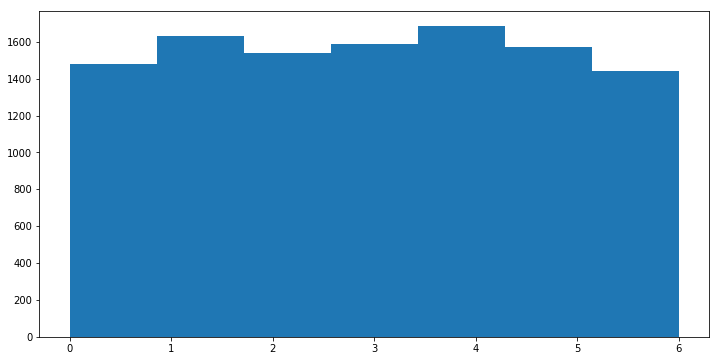

In [31]:
plt.figure(figsize=(12,6))
plt.hist(df_active_app['day_of_week'], bins=7)
plt.show()

### Hour of Day

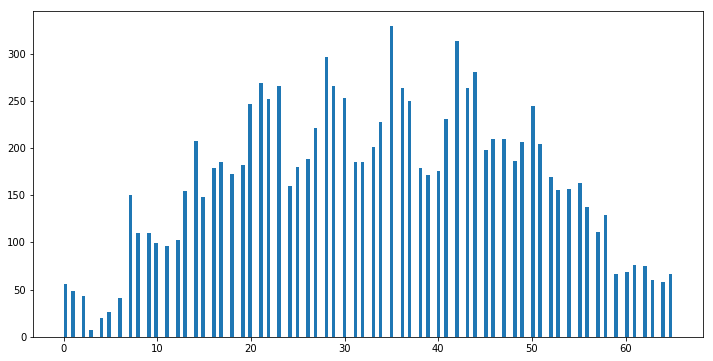

In [34]:
df_hour_dist = df_active_app[['day_of_week',"hour"]].copy()
df_hour_dist['Dist_24_7'] = df_active_app.apply(lambda x: x['day_of_week']*7 + x["hour"], axis=1)

plt.figure(figsize=(12,6))
plt.hist(df_hour_dist['Dist_24_7'], bins=168)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df_hour_dist[["day_of_week", 'hour']], bins=24)
plt.show()

Number of Users per Phone Brand